In [1]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("LLM for cybersecurity")

'Published: 2024-12-04\nTitle: When LLMs Meet Cybersecurity: A Systematic Literature Review\nAuthors: Jie Zhang, Haoyu Bu, Hui Wen, Yongji Liu, Haiqiang Fei, Rongrong Xi, Lun Li, Yun Yang, Hongsong Zhu, Dan Meng\nSummary: The rapid development of large language models (LLMs) has opened new avenues\nacross various fields, including cybersecurity, which faces an evolving threat\nlandscape and demand for innovative technologies. Despite initial explorations\ninto the application of LLMs in cybersecurity, '

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [7]:
wiki.invoke("What is pen testing")

"Page: Penetration test\nSummary: A penetration test, colloquially known as a pentest, is an authorized simulated cyberattack on a computer system, performed to evaluate the security of the system; this is not to be confused with a vulnerability assessment. The test is performed to identify weaknesses (or vulnerabilities), including the potential for unauthorized parties to gain access to the system's features and data, as well as strengths, enabling a full risk assessment to be completed.\nThe pro"

In [8]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [9]:
tools=[wiki,arxiv]

In [13]:
from langchain_groq import ChatGroq
groq=ChatGroq(model="qwen-qwq-32b")
groq.invoke("What is testing")

AIMessage(content='\n<think>\nOkay, so I need to explain what testing is. Hmm, where do I start? Well, testing is a pretty broad term, right? Maybe I should break it down into different contexts because testing can mean different things depending on the field. Let\'s see, there\'s software testing, medical testing, educational testing... Maybe I should start by defining testing in general terms and then go into specific areas.\n\nFirst, the general definition of testing. Testing is a process of evaluating something to determine its characteristics, performance, or quality. It\'s used to check if something meets certain criteria or standards. That makes sense. But I should make sure to mention that it\'s a systematic process.\n\nNow, thinking about software testing. That\'s a big area. In software development, testing is crucial to ensure that the software works as intended. There are different types like unit testing, integration testing, system testing, and user acceptance testing. Ea

In [15]:
llm_with_tools = groq.bind_tools(tools)
llm_with_tools.invoke("Reaserch on cybersecurity")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3g43', 'function': {'arguments': '{"query":"cybersecurity"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 271, 'prompt_tokens': 305, 'total_tokens': 576, 'completion_time': 0.623143209, 'prompt_time': 0.015112509, 'queue_time': 0.271986371, 'total_time': 0.638255718}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8d5e40f7-81cb-48ce-bcca-9d39d11fbdc8-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'cybersecurity'}, 'id': 'call_3g43', 'type': 'tool_call'}], usage_metadata={'input_tokens': 305, 'output_tokens': 271, 'total_tokens': 576})

In [16]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [24]:
def chatbot(state: State):
    return {"messages":llm_with_tools.invoke(state["messages"])}

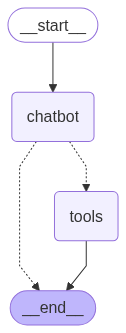

In [26]:
from IPython.display import Image
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langchain_core.messages import HumanMessage

graph = StateGraph(State)
graph.add_node(
    "chatbot",
    chatbot
)
graph.add_node(
    "tools",
    ToolNode(tools)
)

graph.add_edge(START,"chatbot")
graph.add_conditional_edges("chatbot",tools_condition)
graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [33]:
messages=graph_builder.invoke({"messages":HumanMessage(content="What is your opinion on automaing cybersecurity")})

In [34]:
from pprint import pprint
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is your opinion on automaing cybersecurity
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_zj81)
 Call ID: call_zj81
  Args:
    query: Cybersecurity automation
================================= Tool Message =================================
Name: wikipedia

Page: Rockwell Automation
Summary: Rockwell Automation, Inc. is an American provider of industrial automation and digital transformation technologies headquartered in Milwaukee, Wisconsin. Its brands include Allen-Bradley, FactoryTalk software and LifecycleIQ Services. Rockwell Automation employs approximately 27,000 people and has customers in more than 100 countries worldwide.
